# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


In [2]:
!pwd

/mnt/dev/talip/voiseed/notebooks/08_Playground/bet/bestsecrets/data-analysis/sales-analysis


In [1]:
import os
os.makedirs("plots", exist_ok=True)

# Dataset

## Load

In [2]:
df = pd.read_csv("Dataset.csv", parse_dates=["purchase_date"], dayfirst=True)

In [3]:
df.head()

,location,purchase_date,purchase_id,product_code,quantity_sold,quantity_returned,revenue_after_returns
0,3,2020-01-01,1724072,48643,1,0,10
1,3,2020-01-01,1724072,31379,4,0,340
2,3,2020-01-01,2769217,30561,6,0,498
3,3,2020-01-01,2769217,45925,4,0,292
4,3,2020-01-01,2769217,40346,6,0,432


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18729 entries, 0 to 18728
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               18729 non-null  int64         
 1   purchase_date          18729 non-null  datetime64[ns]
 2   purchase_id            18729 non-null  int64         
 3   product_code           18729 non-null  int64         
 4   quantity_sold          18729 non-null  int64         
 5   quantity_returned      18729 non-null  int64         
 6   revenue_after_returns  18729 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 1.0 MB


In [5]:
print('First purchase date:', df.purchase_date.min().date())
print('Last purchase date:', df.purchase_date.max().date())

First purchase date: 2020-01-01
Last purchase date: 2020-01-06


## Dataset Description



This dataset contains **18,729 transaction-level records** of product purchases and returns across multiple locations within a the first week of 2020.

### Time Range
- **First purchase date:** 2020-01-01  
- **Last purchase date:** 2020-01-06  
- Coverage: **6 days**

### Columns Overview

#### 1. `location` *(int64)*
Identifier of the store.

#### 2. `purchase_date` *(datetime64[ns])*
Timestamp of the purchase event.

#### 3. `purchase_id` *(int64)*
Unique identifier for each purchase.  

#### 4. `product_code` *(int64)*
Unique identifier for the purchased product.  

#### 5. `quantity_sold` *(int64)*
Number of units sold in the transaction.  

#### 6. `quantity_returned` *(int64)*
Units returned from the purchase.  

#### 7. `revenue_after_returns` *(int64)*
Net revenue after accounting for customer returns.  


_NOTE: For description AI is used to formalize my writings_


## Data Preprocessing

* To enable data analysis I compute the:
  * net units sold
  * return rate
  * unit price
  * week day

* Then I convert integer values purchase_id, product_code and location into categorical variables to do my analysis.

* Since we don't have any null values we don't need to do any data imputation.
  
* Ensure we don't have duplicates of purchase id and product code. (In the dataset we have a record for each purchase and product pair)
  
* Checked for outliers if we have any.




### Derive New Attributes

In [6]:

df['net_units_sold'] = df['quantity_sold'] - df['quantity_returned']

df['return_rate'] = df['quantity_returned'] / df['quantity_sold']

df['unit_price'] = df['revenue_after_returns'] / df['net_units_sold']

df['day_of_week'] = df['purchase_date'].dt.day_name()

df['purchase_id'] = df['purchase_id'].astype('category')

df['product_code'] = df['product_code'].astype('category')

df['location'] = df['location'].astype('category')



In [7]:
df.head(4)

,location,purchase_date,purchase_id,product_code,quantity_sold,quantity_returned,revenue_after_returns,net_units_sold,return_rate,unit_price,day_of_week
0,3,2020-01-01,1724072,48643,1,0,10,1,0.0,10.0,Wednesday
1,3,2020-01-01,1724072,31379,4,0,340,4,0.0,85.0,Wednesday
2,3,2020-01-01,2769217,30561,6,0,498,6,0.0,83.0,Wednesday
3,3,2020-01-01,2769217,45925,4,0,292,4,0.0,73.0,Wednesday


### Null Check

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18729 entries, 0 to 18728
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               18729 non-null  category      
 1   purchase_date          18729 non-null  datetime64[ns]
 2   purchase_id            18729 non-null  category      
 3   product_code           18729 non-null  category      
 4   quantity_sold          18729 non-null  int64         
 5   quantity_returned      18729 non-null  int64         
 6   revenue_after_returns  18729 non-null  int64         
 7   net_units_sold         18729 non-null  int64         
 8   return_rate            18729 non-null  float64       
 9   unit_price             18640 non-null  float64       
 10  day_of_week            18729 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.9+ MB


### Statistics of the Attributes

In [9]:
df[['location', 'purchase_id', 'product_code', 'day_of_week']].describe()

,location,purchase_id,product_code,day_of_week
count,18729,18729,18729,18729
unique,3,6554,11136,6
top,1,1365400,18772,Monday
freq,10983,28,845,5598


Statistis for categorical attributes. Most bought product is bought 845 times and biggest basket size is 28.

In [10]:
df.describe()

,purchase_date,quantity_sold,quantity_returned,revenue_after_returns,net_units_sold,return_rate,unit_price
count,18729,18729.000000,18729.000000,18729.000000,18729.000000,18729.000000,18640.000000
mean,2020-01-03 22:12:30.792888064,3.988574,0.027818,291.634097,3.960756,0.010941,73.855043
min,2020-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2020-01-02 00:00:00,2.000000,0.000000,102.000000,2.000000,0.000000,34.000000
50%,2020-01-04 00:00:00,4.000000,0.000000,222.000000,4.000000,0.000000,73.000000
75%,2020-01-06 00:00:00,6.000000,0.000000,429.000000,6.000000,0.000000,109.000000
max,2020-01-06 00:00:00,7.000000,4.000000,1050.000000,7.000000,1.000000,150.000000
std,NaN,2.002769,0.167352,236.855567,2.011582,0.081736,41.730345


Looking at the statiscs of the numerical attributes of the data we don't have any weird outliers. They all fit in the data distribution

In [11]:
df[['purchase_id', 'product_code']].value_counts().max()

np.int64(1)

In our dataset purchase id and product code creates the uniqueness

# Explatory Data Analysis

## Revenue Contribution of Price Segment

I would like to analyze the contribution of prices segments into total revenue. To do this I first quantize prices into bins of:
* Low (0€ - 20€) 
* Medium (20€ - 50€) 
* High (50€ - 100€) 
* Very High (100€+)"

Then visualize in pie chart

In [12]:
df.unit_price.describe()

count    18640.000000
mean        73.855043
std         41.730345
min          5.000000
25%         34.000000
50%         73.000000
75%        109.000000
max        150.000000
Name: unit_price, dtype: float64

In [13]:

price_segment_labels = [
    f"Low (0€ - 20€)", 
    f"Medium (20€ - 50€)", 
    f"High (50€ - 100€)", 
    f"Very High (100€+)"
]


# We are assigning each value into its corresponding bin using pandas cut function.
df['price_segment'] = pd.cut(df['unit_price'], bins=[0, 20, 50, 100, float('inf')], labels=price_segment_labels)


# We are computing the revenue of each segment
revenue_by_segment = df.groupby('price_segment')['revenue_after_returns'].sum().reset_index()

/tmp/ipykernel_25060/3432841346.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_segment = df.groupby('price_segment')['revenue_after_returns'].sum().reset_index()


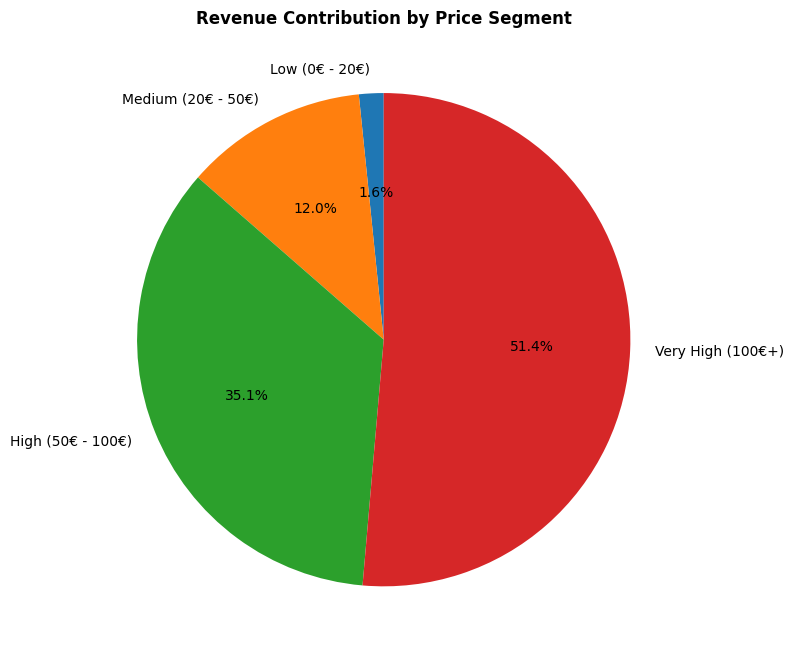

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_segment['revenue_after_returns'], 
        labels=revenue_by_segment['price_segment'], 
        autopct='%1.1f%%', # value to show on the pie chart slices. I used AI to find out this
        startangle=90, 
        colors=sns.color_palette("tab10", len(revenue_by_segment))
       )

plt.title('Revenue Contribution by Price Segment', fontsize=12, fontweight='bold')
plt.tight_layout()

plt.savefig("plots/revenue_contribution_by_price_segment.png", dpi=300, bbox_inches='tight')

plt.show()


Looking at the pie plot we can see that more than half of the revenue is coming from items that are greater than 100 euros. This shows that expensive segments products are most important for our company

## Boxplot of Unit Price

In the following chart I plot the box plot of the unit prices to understand unit price distribution

/tmp/ipykernel_25060/1312686932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='unit_price', palette="tab10")


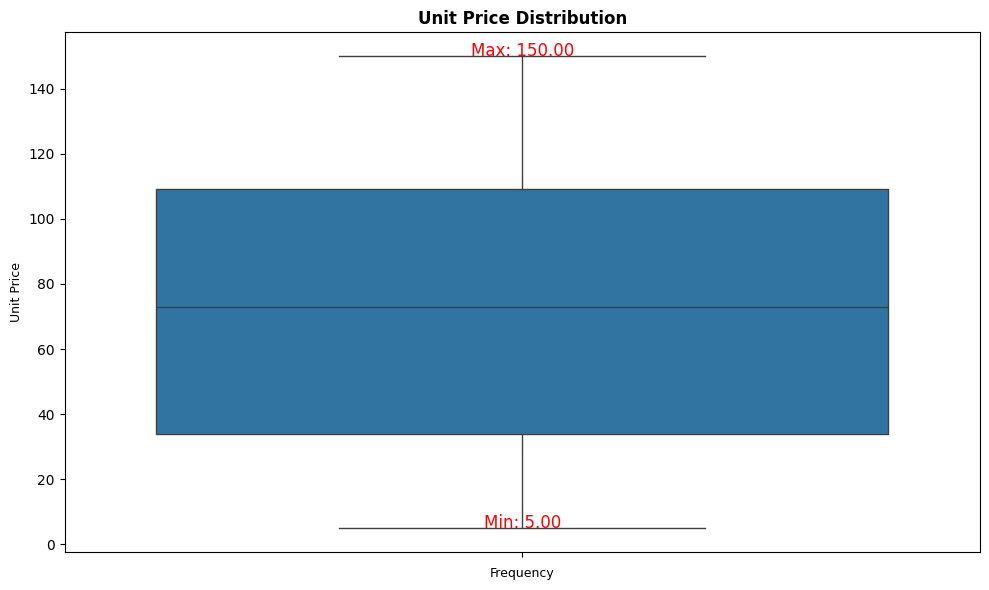

In [15]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, y='unit_price', palette="tab10")

min_value = df['unit_price'].min()
max_value = df['unit_price'].max()

plt.text(0, min_value, f'Min: {min_value:.2f}', horizontalalignment='center', fontsize=12, color='red')
plt.text(0, max_value, f'Max: {max_value:.2f}', horizontalalignment='center', fontsize=12, color='red')

plt.title('Unit Price Distribution', fontsize=12, fontweight='bold')
plt.ylabel('Unit Price', fontsize=9)
plt.xlabel('Frequency', fontsize=9)

plt.savefig("plots/unit_price_distribution.png", dpi=300, bbox_inches='tight') # To save tight I used AI to pass the correct parameter

plt.tight_layout()
plt.show()


As seen in the box plot we have prices between 5 euros and 150 euros with median around 75 euros. We don't have any outliers

## Daily Total Revenue Trend

To plot daily revenue trend I use line chart. This chart shows us how the daily revenue trend is going

/tmp/ipykernel_25060/2823890063.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=revenue_by_date, x='purchase_date', y='revenue_after_returns', marker="o", color="b", palette='tab10')


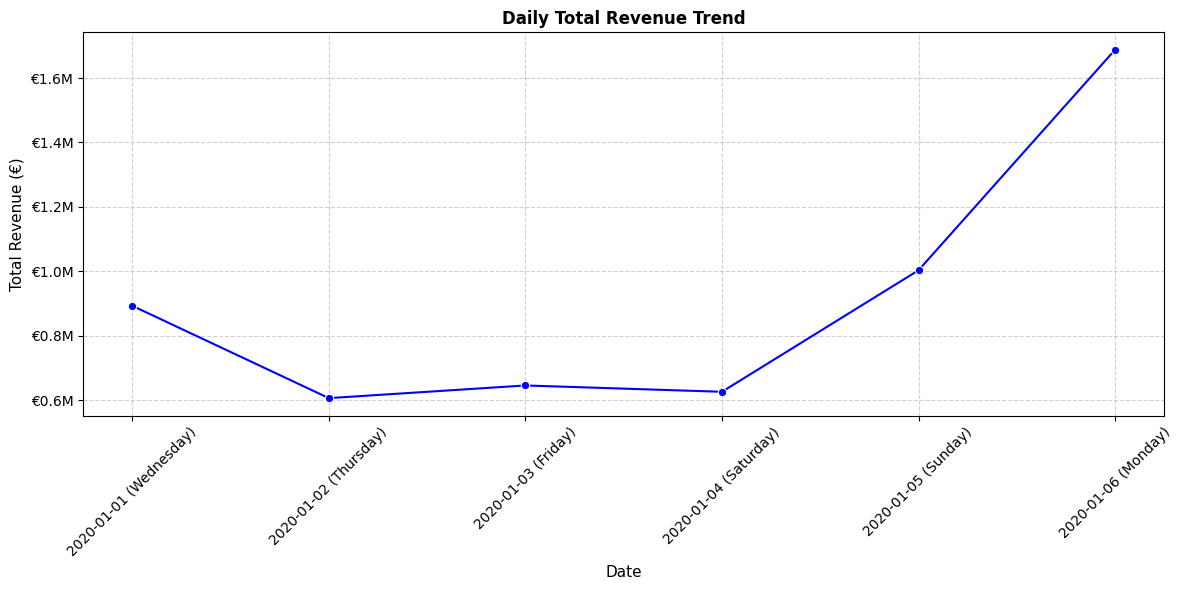

In [16]:

revenue_by_date = df.groupby(['purchase_date', 'day_of_week'])['revenue_after_returns'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_by_date, x='purchase_date', y='revenue_after_returns', marker="o", color="b", palette='tab10')

# Format x-axis with day of the week
plt.xticks(ticks=revenue_by_date['purchase_date'], 
           labels=[f"{d.strftime('%Y-%m-%d')} ({dow})" for d, dow in zip(revenue_by_date['purchase_date'], revenue_by_date['day_of_week'])], 
           rotation=45)

plt.title('Daily Total Revenue Trend', fontsize=12, fontweight="bold")
plt.xlabel('Date', fontsize=11)
plt.ylabel('Total Revenue (€)', fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)

# Format y-axis to show millions (€) instead of scientific notation # To do this I used AI
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'€{x/1e6:.1f}M'))

plt.tight_layout()

plt.savefig("plots/daily_total_revenue_trend.png", dpi=300, bbox_inches='tight')

plt.show()


## Daily Revenue Trend by Location

We expand the trend analysis in location level

/tmp/ipykernel_25060/4166115021.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_date_location = df.groupby(['purchase_date', 'location'])['revenue_after_returns'].sum().reset_index()


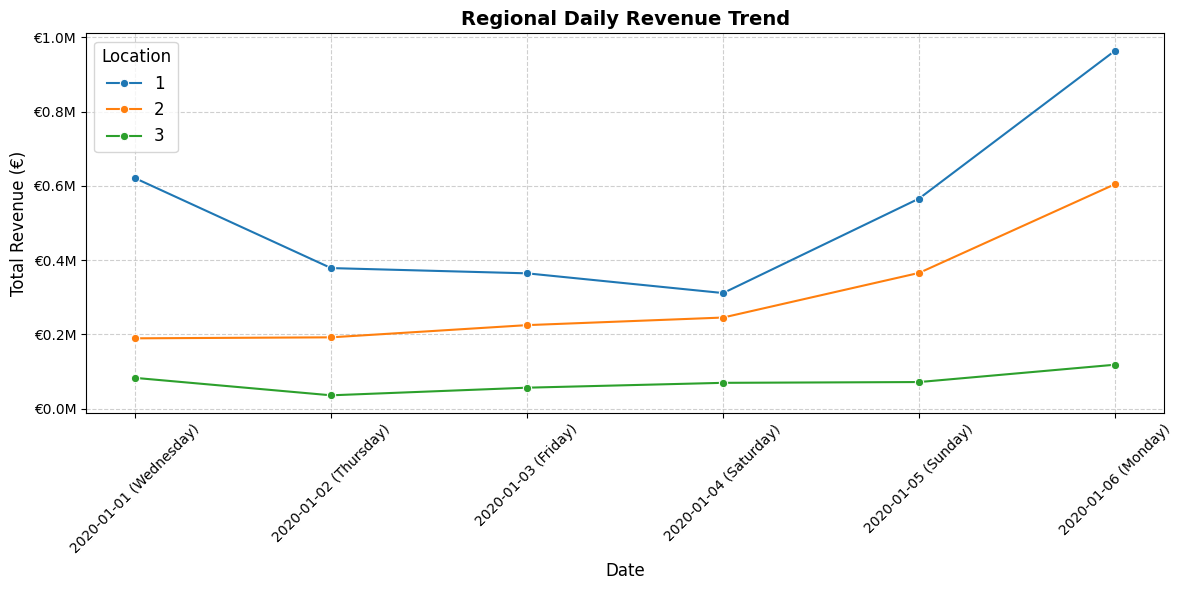

In [17]:
revenue_by_date_location = df.groupby(['purchase_date', 'location'])['revenue_after_returns'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_by_date_location, x='purchase_date', y='revenue_after_returns', hue='location', marker="o", palette='tab10')


revenue_by_date_location['day_of_week'] = revenue_by_date_location['purchase_date'].dt.day_name()

unique_dates = revenue_by_date_location[['purchase_date', 'day_of_week']].drop_duplicates()

# For the xticks help from AI is used
plt.xticks(
    ticks=unique_dates['purchase_date'],
    labels=[
        f"{d.strftime('%Y-%m-%d')} ({dow})"
        for d, dow in zip(unique_dates['purchase_date'], unique_dates['day_of_week'])
    ],
    rotation=45
)


plt.title('Regional Daily Revenue Trend', fontsize=14, fontweight="bold")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue (€)', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# For the yticks help from AI is used
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'€{x/1e6:.1f}M'))

plt.legend(title='Location', fontsize=12, title_fontsize=12, loc='upper left')

plt.tight_layout()

plt.savefig("plots/regional_daily_revenue_trend.png", dpi=300, bbox_inches='tight')

plt.show()


Looking at the trends all locations have a increase starting from saturday. This might come because the new year's holiday is finishing and we are reaching to weekend.

## Revenue Distribution by Location

In the following chart we analyze the contribution of each location into total revenue

/tmp/ipykernel_25060/3875198099.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_loc = df.groupby('location')['revenue_after_returns'].sum().reset_index()


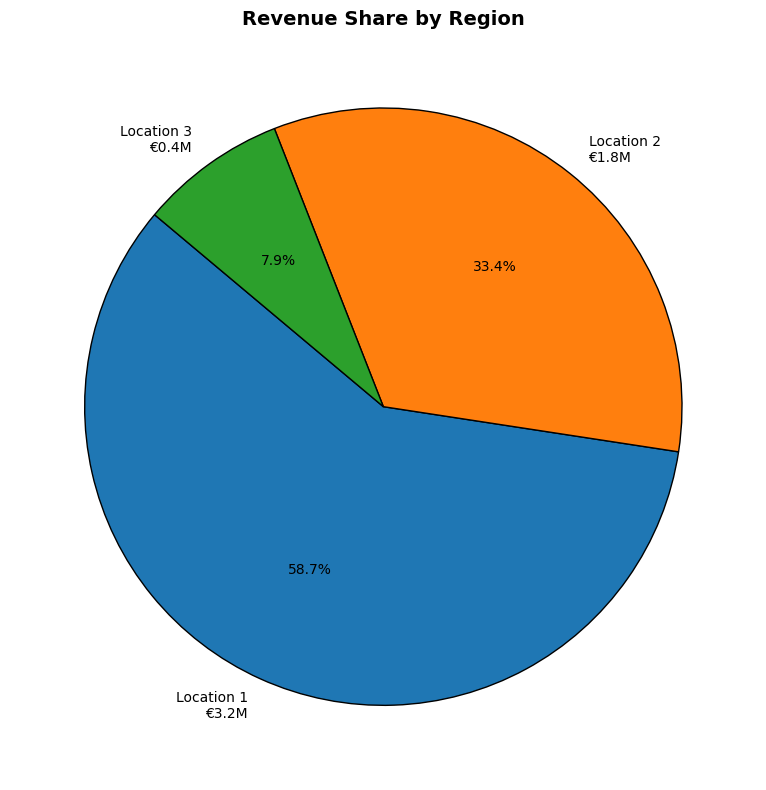

In [18]:
revenue_by_loc = df.groupby('location')['revenue_after_returns'].sum().reset_index()

palette = sns.color_palette("tab10", len(revenue_by_loc))

# Create the figure
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_loc['revenue_after_returns'], 
        labels=[f"Location {loc}\n€{rev/1e6:.1f}M" for loc, rev in zip(revenue_by_loc['location'], revenue_by_loc['revenue_after_returns'])],  
        autopct='%1.1f%%', startangle=140, colors=palette, wedgeprops={'edgecolor': 'black'})

plt.title('Revenue Share by Region', fontsize=14, fontweight="bold")

plt.tight_layout()

plt.savefig("plots/revenue_share_by_region.png", dpi=300, bbox_inches='tight')

plt.show()


Looking at the pie chart we can see the almost 60% of the revenue comes from the Location 1.

## Top 10 Products by Revenue Contribution

/tmp/ipykernel_25060/2013518809.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products_global = (df.groupby('product_code')['revenue_after_returns']
/tmp/ipykernel_25060/2013518809.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products_global,


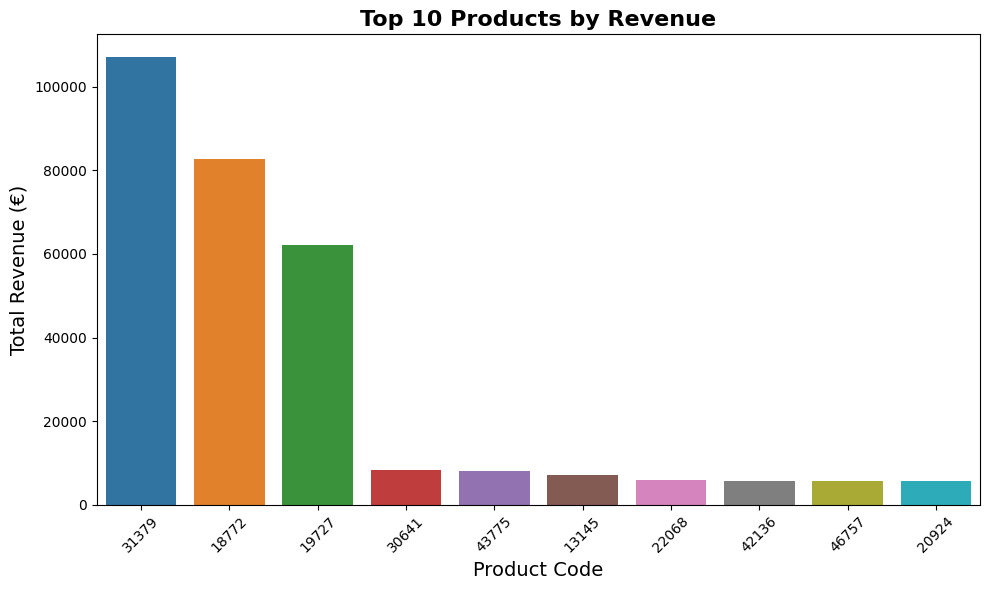

In [19]:
# Here we group by product_code and sum the revenue
top_products_global = (df.groupby('product_code')['revenue_after_returns']
                         .sum()
                         .reset_index()
                         .sort_values(by='revenue_after_returns', ascending=False)
                         .head(10))

plt.figure(figsize=(10, 6))

sns.barplot(data=top_products_global, 
            x='product_code', 
            y='revenue_after_returns', 
            palette="tab10", 
            order=top_products_global['product_code'])

plt.title('Top 10 Products by Revenue', fontsize=16, fontweight="bold")
plt.xlabel('Product Code', fontsize=14)
plt.ylabel('Total Revenue (€)', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig("plots/top_10_products_by_revenue.png", dpi=300, bbox_inches='tight')

plt.show()


## Top 50 Products by Return Rate

Here we analyze the top 10 products that has highest return rate

/tmp/ipykernel_25060/1638108342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returns_global = (df.groupby('product_code')
/tmp/ipykernel_25060/1638108342.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_returns_global,


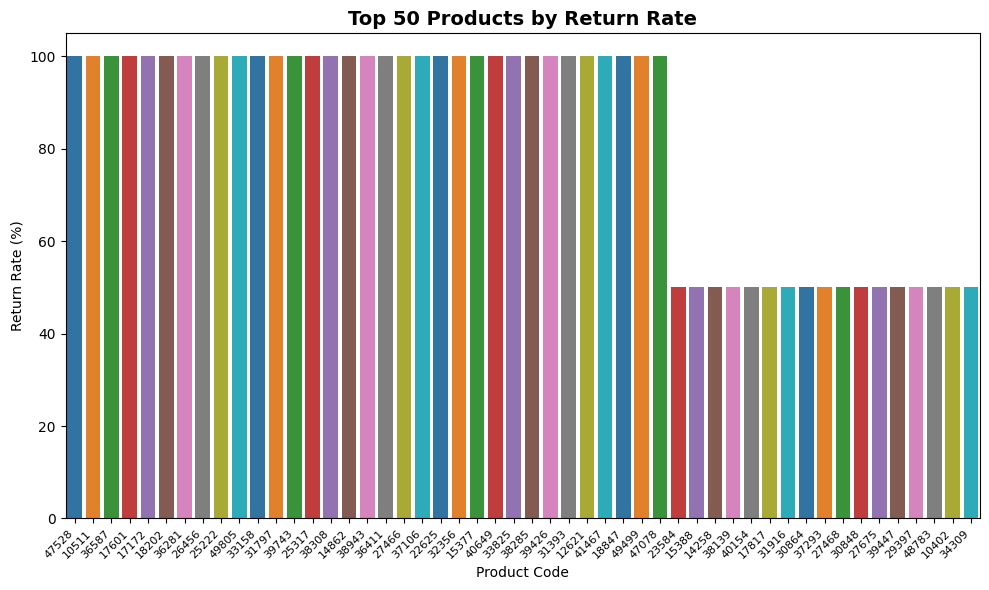

In [20]:
returns_global = (df.groupby('product_code')
                    .agg({'quantity_returned': 'sum', 'quantity_sold': 'sum'})
                    .reset_index())

returns_global['return_rate'] = 100 * returns_global['quantity_returned'] / returns_global['quantity_sold']

top_returns_global = returns_global.sort_values(by='return_rate', ascending=False).head(50)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_returns_global,
            x='product_code',
            y='return_rate', 
            order=top_returns_global['product_code'],
            palette="tab10",
           )

plt.title('Top 50 Products by Return Rate', fontsize=14, fontweight="bold")
plt.xlabel('Product Code')
plt.ylabel('Return Rate (%)')

plt.xticks(rotation=45, ha='right', fontsize=8)  # Reduced font size for product codes

plt.tight_layout()

plt.savefig("plots/top_50_products_by_return_rate.png", dpi=300, bbox_inches='tight')

plt.show()


In [21]:
returns_global[returns_global.return_rate == 100].shape, returns_global[returns_global.return_rate == 100].quantity_sold.value_counts().max()

((33, 4), np.int64(33))

There are 33 products that are sold just once and returned. Probably these products have some issues. We should inspect it more

## Transaction Revenue Distribution by Location

Here we analyze the transaction revenue by location.

/tmp/ipykernel_25060/3399628649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_revenue = df.groupby(['purchase_id', 'location'])['revenue_after_returns'].sum().reset_index()
/tmp/ipykernel_25060/3399628649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=purchase_revenue, x='location', y='revenue_after_returns', palette='tab10')


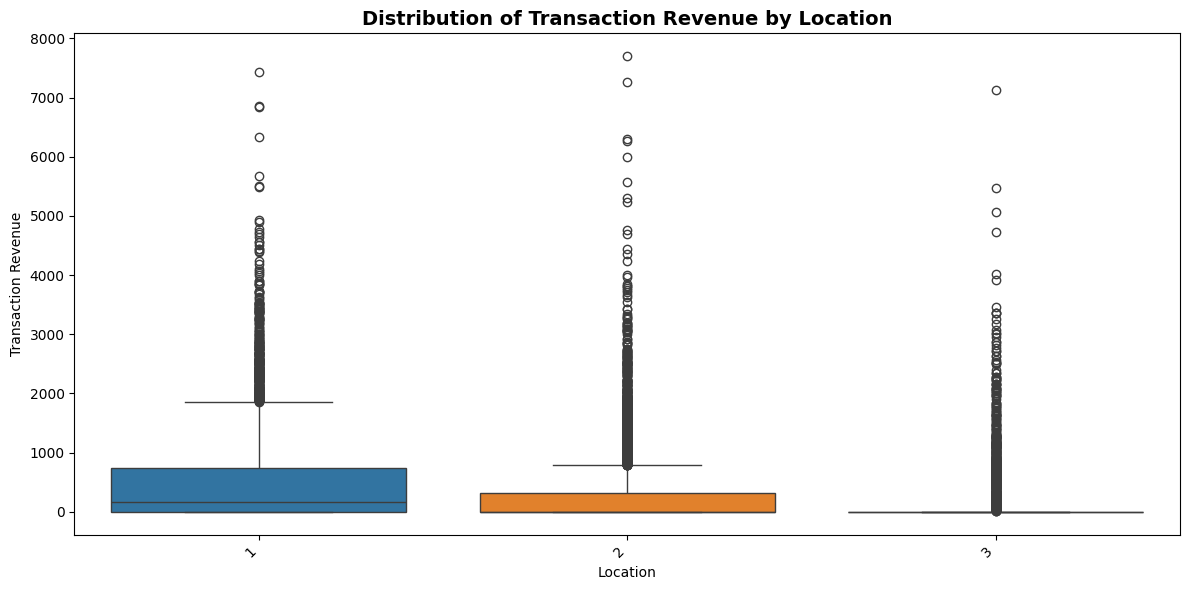

In [22]:
purchase_revenue = df.groupby(['purchase_id', 'location'])['revenue_after_returns'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.boxplot(data=purchase_revenue, x='location', y='revenue_after_returns', palette='tab10')

plt.title('Distribution of Transaction Revenue by Location', fontsize=14, fontweight="bold")
plt.xlabel('Location')
plt.ylabel('Transaction Revenue')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.savefig("plots/transaction_revenue_distribution_with_by_location.png", dpi=300, bbox_inches='tight')

plt.show()


Looking at the box plot location 1 has larger transction revenue and larger standard deviation. This is inline with the fact that location 1 has highest contribution to revenue as we found out in our previous analyis

## Distribution of Basket Size by Location

/tmp/ipykernel_25060/150996857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_items = df.groupby(['purchase_id', 'location'])['quantity_sold'].sum().reset_index()
/tmp/ipykernel_25060/150996857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=purchase_items, x='location', y='quantity_sold', palette='tab10')


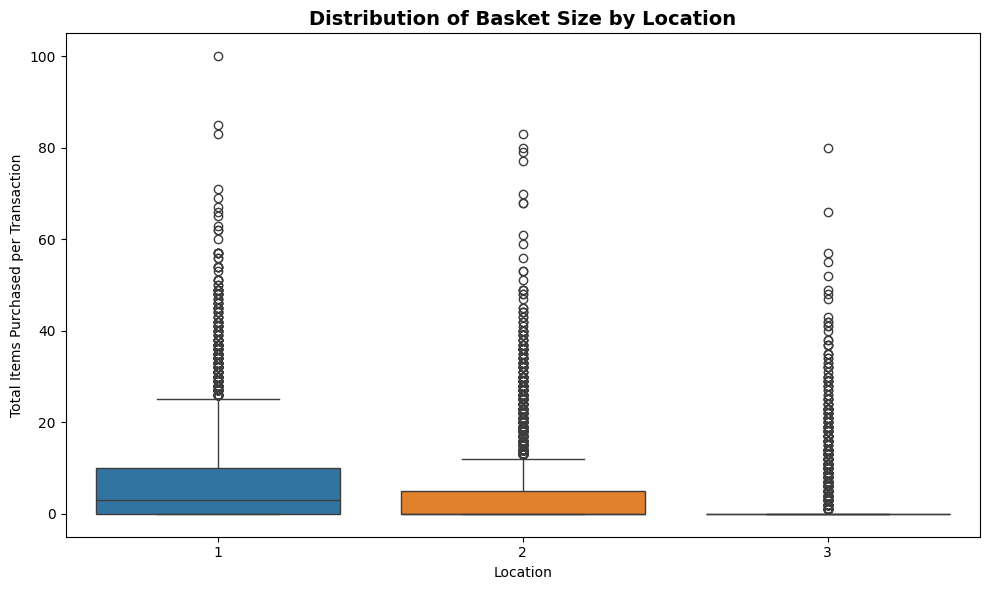

In [23]:

purchase_items = df.groupby(['purchase_id', 'location'])['quantity_sold'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(data=purchase_items, x='location', y='quantity_sold', palette='tab10')

plt.title('Distribution of Basket Size by Location', fontsize=14, fontweight="bold")
plt.xlabel('Location')
plt.ylabel('Total Items Purchased per Transaction')
plt.tight_layout()

plt.savefig("plots/basket_size_by_location.png", dpi=300, bbox_inches='tight')

plt.show()

Similar to transction revenue location one has larger basket sizes compared to other locations.

## Distribution of Return Percentage per Transaction by Location

/tmp/ipykernel_25060/298913039.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_totals = df.groupby(['purchase_id', 'location'])['quantity_sold'].sum().reset_index()
/tmp/ipykernel_25060/298913039.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_returns = df.groupby(['purchase_id', 'location'])['quantity_returned'].sum().reset_index()
/tmp/ipykernel_25060/298913039.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=purchase_dat

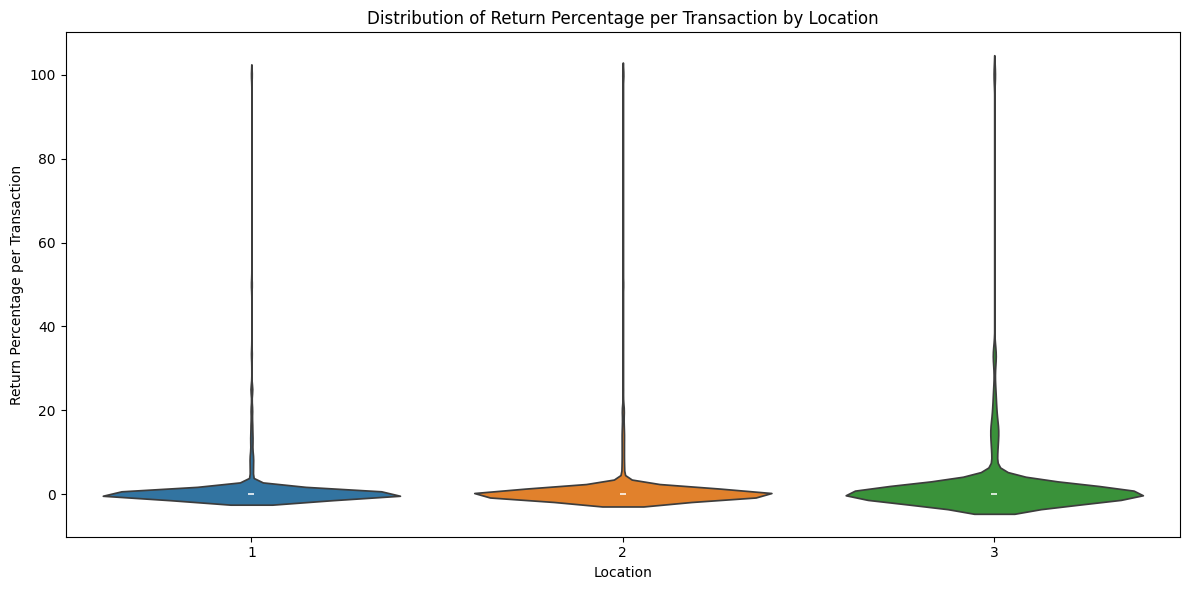

In [24]:
purchase_totals = df.groupby(['purchase_id', 'location'])['quantity_sold'].sum().reset_index()

purchase_returns = df.groupby(['purchase_id', 'location'])['quantity_returned'].sum().reset_index()

purchase_data = pd.merge(purchase_returns, purchase_totals, on=['purchase_id', 'location'])

purchase_data['return_percentage'] = (purchase_data['quantity_returned'] / purchase_data['quantity_sold']) * 100

plt.figure(figsize=(12, 6))
sns.violinplot(data=purchase_data, x='location', y='return_percentage', palette="tab10")

plt.title('Distribution of Return Percentage per Transaction by Location')
plt.xlabel('Location')
plt.ylabel('Return Percentage per Transaction')

plt.savefig("plots/distribution_of_return_percentage_per_transcaction_by_location.png", dpi=300, bbox_inches='tight')

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()


As expected being location 3 is the worts location for revenue it is also the one with highest return orders. Company should analyze why location 3 is performing worse compared to others. Is it due to market of the location or do we have supply chain issues there?

## Average Order Value by Location

Here we are plotting average order value per location to understand how much per order brings revenue

/tmp/ipykernel_25060/4077669273.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aov = purchase_revenue.groupby('location')['revenue_after_returns'].mean().reset_index()
/tmp/ipykernel_25060/4077669273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aov, x='location', y='revenue_after_returns', palette="tab10")


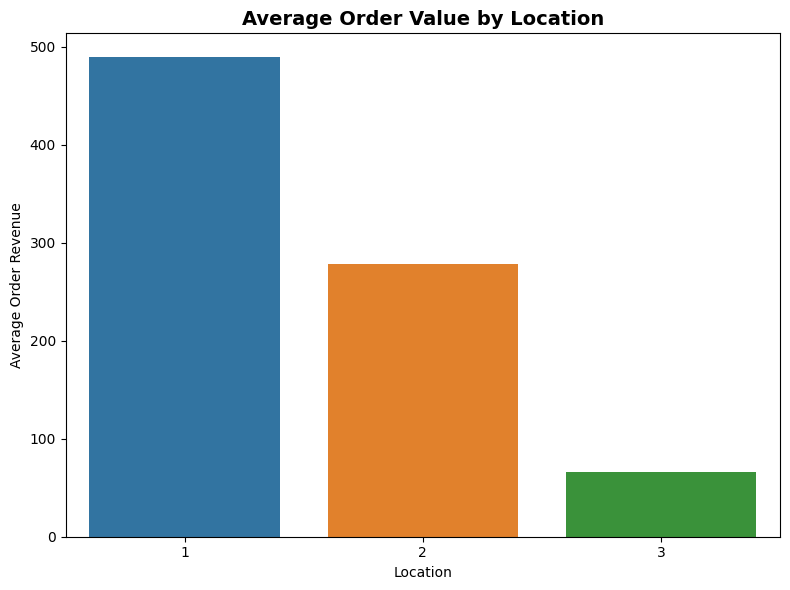

In [25]:
aov = purchase_revenue.groupby('location')['revenue_after_returns'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=aov, x='location', y='revenue_after_returns', palette="tab10")
plt.title('Average Order Value by Location', fontsize=14, fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Average Order Revenue')
plt.tight_layout()


plt.savefig("plots/average_order_value_by_location.png", dpi=300, bbox_inches='tight')

plt.show()



As expected Location 1 has the highest average order revenue per purchase

## Daily Return Rate Trend

To understand if there is a trend with returns and days we plot daily return rate trend

/tmp/ipykernel_25060/3467467381.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=daily_returns, x='purchase_date', y='return_rate', marker="o", palette="tab10")


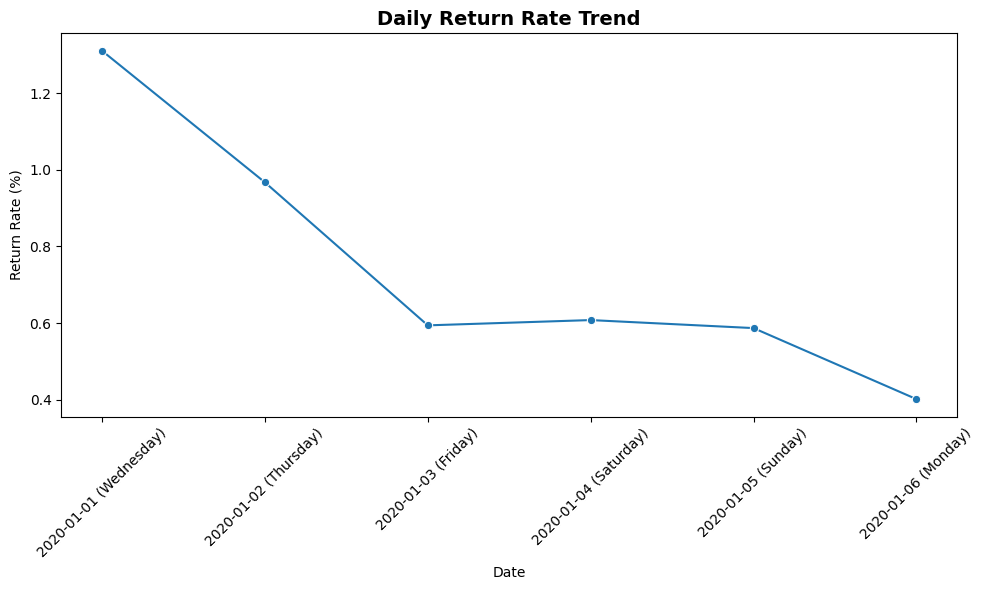

In [26]:

daily_returns = df.groupby('purchase_date').agg({'quantity_returned': 'sum', 'quantity_sold': 'sum'}).reset_index()

daily_returns['return_rate'] = 100 * daily_returns['quantity_returned'] / daily_returns['quantity_sold']

daily_returns['day_of_week'] = daily_returns['purchase_date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_returns, x='purchase_date', y='return_rate', marker="o", palette="tab10")

plt.title('Daily Return Rate Trend', fontsize=14, fontweight='bold')

plt.xlabel('Date')

plt.ylabel('Return Rate (%)')

plt.xticks(ticks=daily_returns['purchase_date'], 
           labels=[f"{d.strftime('%Y-%m-%d')} ({dow})" for d, dow in zip(daily_returns['purchase_date'], daily_returns['day_of_week'])], 
           rotation=45)

plt.tight_layout()

plt.savefig("plots/daily_return_rate_trend_percentage.png", dpi=300, bbox_inches='tight')

plt.show()


As it's seen there is a decrease in the return rates. This might show that we fixed an issue that was causing high returns. But it has to be verified.

# Ethical Considerations

The dataset is fully anonymized and contains no private, sensitive, or confidential information. All identifiers have been removed or transformed to ensure that individual customers, employees, or locations cannot be re-identified.